# Ratings and Scores of Beers

### Import the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import pyodbc

### Query data from SQL Server
A beer can be associate with multiple locations.  For example, a beer can be sold at a brewery and a taproom.  Thus, the beer records are grouped by their URL which is a unique identifier for each beer.

In [2]:
sql_conn = pyodbc.connect('DRIVER={ODBC Driver 13 for SQL Server};SERVER=localhost;DATABASE=BA;Trusted_Connection=yes') 
query = '''
SELECT MAX(BR.name) AS 'brewery_name', MAX(B.name) AS 'beer_name', MAX(style) AS style, MAX(abv) AS abv, MAX(B.ratings) AS ratings, MAX(B.score) AS score
FROM beers B
LEFT JOIN breweries BR ON B.brewery_id = BR.brewery_id
GROUP BY [url]'''
df = pd.read_sql(query, sql_conn)

df.head(5)

,brewery_name,beer_name,style,abv,ratings,score
0,Mad Chef Craft Brewing,Mad Fire Golden Goose,Braggot,7.00,1,3.89
1,Wartega,Rantallion,Herb and Spice Beer,4.50,0,0.00
2,Portsmouth Brewery,Portsmouth Redwood Rye Lager,Rye Beer,5.60,3,3.80
3,Fitger's Brewhouse,El Diablo,Belgian Strong Pale Ale,8.20,10,3.93
4,Lafayette Brewing Co.,Marley's VSOP,English Porter,8.10,1,3.91


### Distribution of scores (ie. ratings) of individual beers.

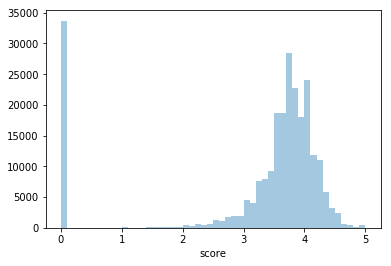

In [3]:
sns.distplot(df['score'], kde=False)

There's a large number of beers with a score of 0.

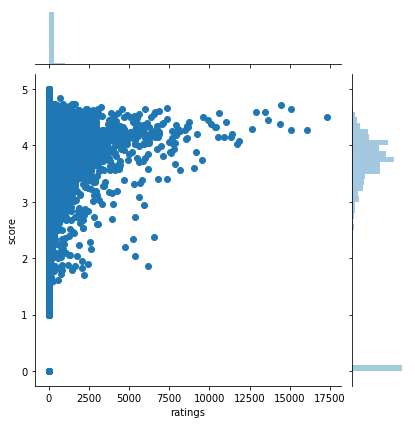

In [4]:
sns.jointplot('ratings','score',data=df)

The large number of beers with a score of 0 is explained by the lack of ratings (also 0).  The beers without ratings will be dropped.

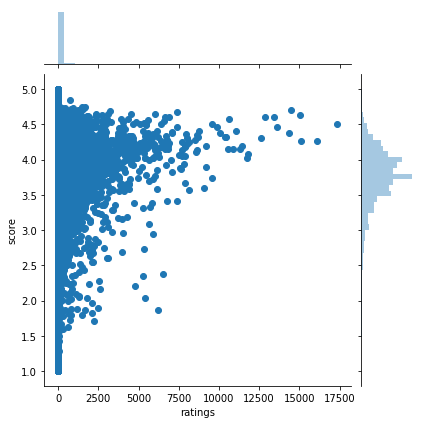

In [5]:
df.drop(df[df['ratings'] == 0].index, inplace=True)

sns.jointplot('ratings','score',data=df)

The data is still skewed heavily to low ratings quanity.  Even for beers with less than 100 ratings, the data is heavily skewed, the beers with less than 100 ratings will be dropped.

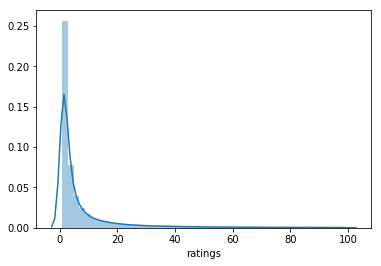

In [6]:
sns.distplot(df[df['ratings'] < 100]['ratings'])

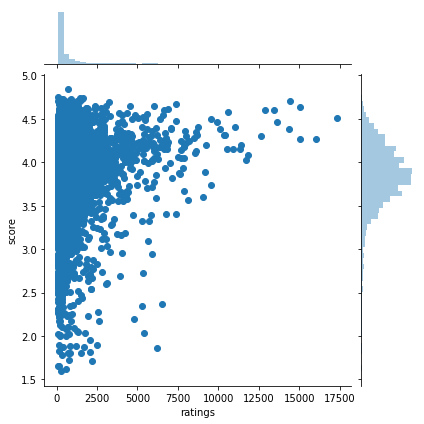

In [7]:
df.drop(df[df['ratings'] < 100].index, inplace=True)

sns.jointplot('ratings','score',data=df)

The data appears to have a slight trend, when ratings count increases score will also increase.  Here are the beers with more than 10,000 reviews, note the consistent score above 4.

In [10]:
df[df['ratings'] > 10000].sort_values('ratings', ascending=False)

,brewery_name,beer_name,style,abv,ratings,score
228809,Founders Brewing Company,Breakfast Stout,American Imperial Stout,8.30,17331,4.51
164902,Dogfish Head Craft Brewery,90 Minute IPA,American Imperial IPA,9.00,16072,4.27
218953,Bell's Brewery - Eccentric Café & General Store,Two Hearted Ale,American IPA,7.00,15074,4.27
19441,Russian River Brewing Company,Pliny The Elder,American Imperial IPA,8.00,15056,4.64
167115,The Alchemist,Heady Topper,New England IPA,8.00,14456,4.71
88346,Ballast Point Brewing Company,Sculpin,American IPA,7.00,14366,4.38
6699,Bell's Brewery - Eccentric Café & General Store,Hopslam Ale,American Imperial IPA,10.00,13629,4.46
83300,Founders Brewing Company,KBS (Kentucky Breakfast Stout),American Imperial Stout,12.30,13452,4.60
242922,Goose Island Beer Co.,Bourbon County Brand Stout,American Imperial Stout,15.20,12886,4.60
2321,North Coast Brewing Co.,Old Rasputin,Russian Imperial Stout,9.00,12634,4.30


Visualize a linear regression.

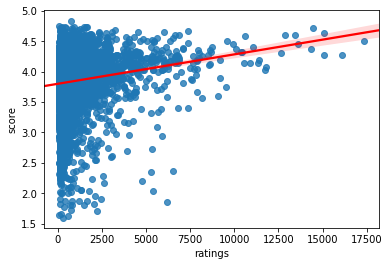

In [16]:
sns.regplot('ratings','score',data=df,line_kws={'color': 'red'})